In [60]:
include("./main.jl")
using .Main
data = read_data(0)

Measurement([0.0 0.0 … NaN NaN; 0.0 -0.5634222031 … NaN NaN; … ; 91.00159992 0.008562088013 … NaN NaN; 91.03930512 -0.0009422302246 … NaN NaN], [1.109552618 1008.712463 … 1.609554441 2.747235577; 2.109556264 1008.383728 … 2.609553894 -7.467330173; … ; 89.0695676 1008.549988 … 89.5695676 -1.190947741; 90.0695676 1008.692505 … NaN NaN])

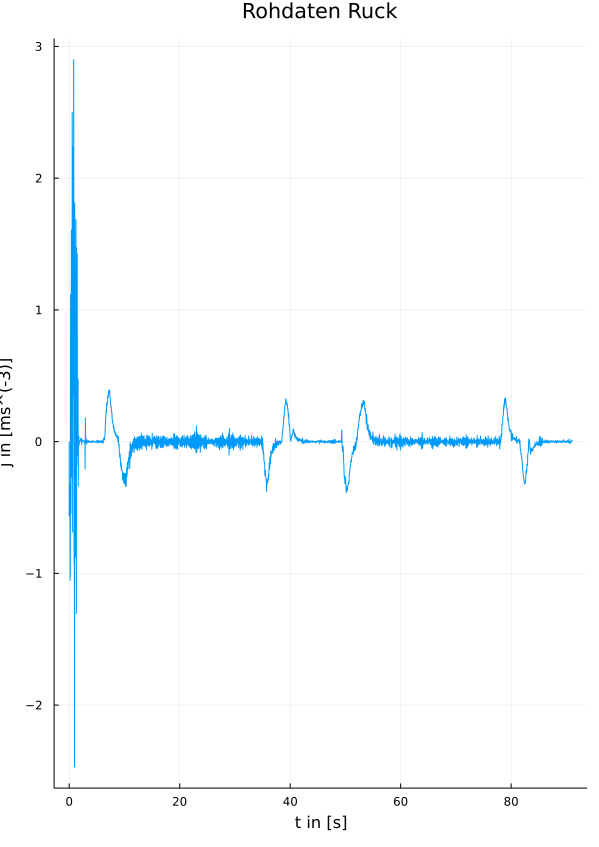

In [61]:
plot_layout(data.acc_and_vel[:, 1], data.acc_and_vel[:, 2], "jerk", "Rohdaten Ruck")

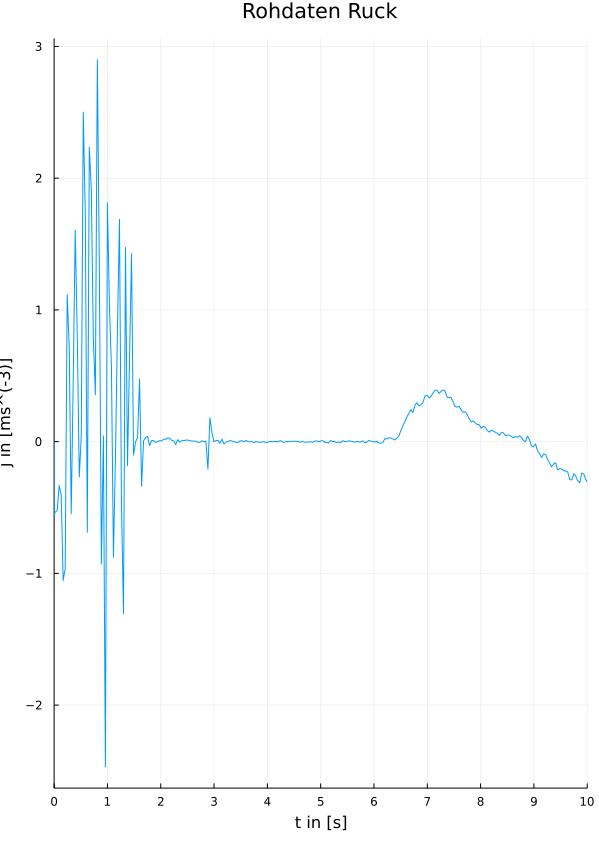

In [62]:
zoom_and_grid(0, 10)

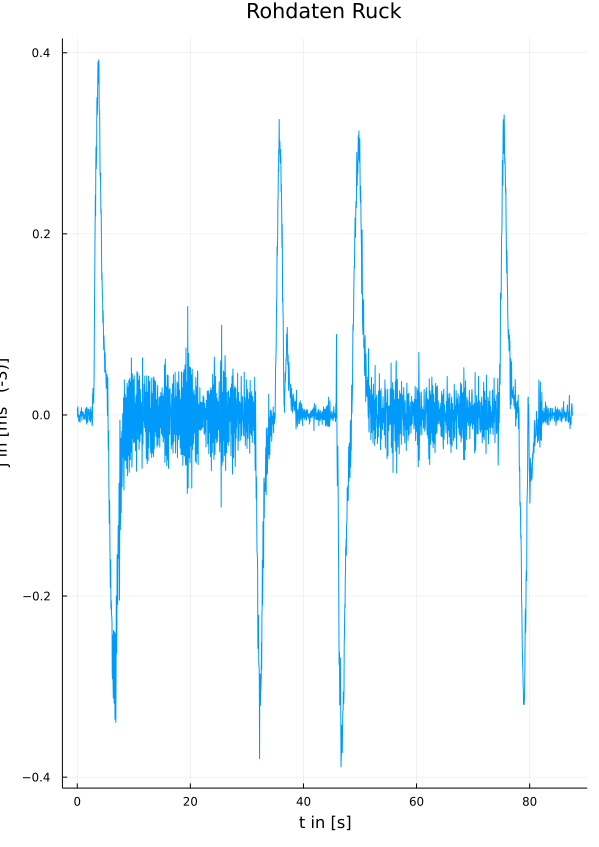

In [63]:
data = cut(data, 0, 3.5)
plot_layout(data.acc_and_vel[:, 1], data.acc_and_vel[:, 2], "jerk", "Rohdaten Ruck")

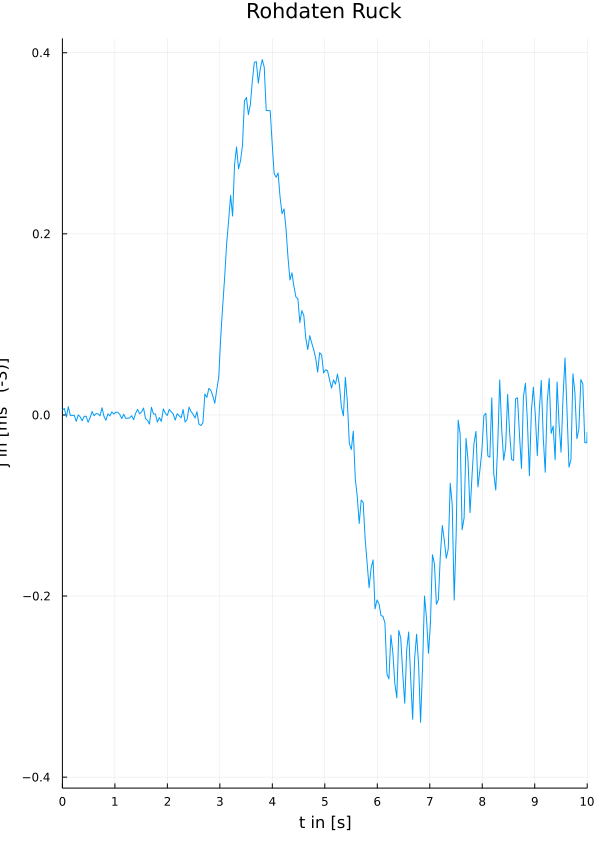

In [64]:
zoom_and_grid(0, 10)

In [65]:
noise_profile(data, 0, 2.5)

Average offset: -0.00011118134450626866 [m/s^3]


-0.00011118134450626866

In [66]:
data = cut(data, 0, 2.5)

Measurement([0.0 0.001130104065 … NaN NaN; 0.03770499999999988 -0.003414154053 … NaN NaN; … ; 85.024935427 0.008562088013 … NaN NaN; 85.062640627 -0.0009422302246 … NaN NaN], [0.0 1008.859985 … 0.0 0.04181615502; 1.000008438 1008.85498 … 0.9999982560000005 3.2381908; … ; 83.96001644100001 1008.549988 … 83.96001222199999 -1.190947741; 84.96001644100001 1008.692505 … NaN NaN])

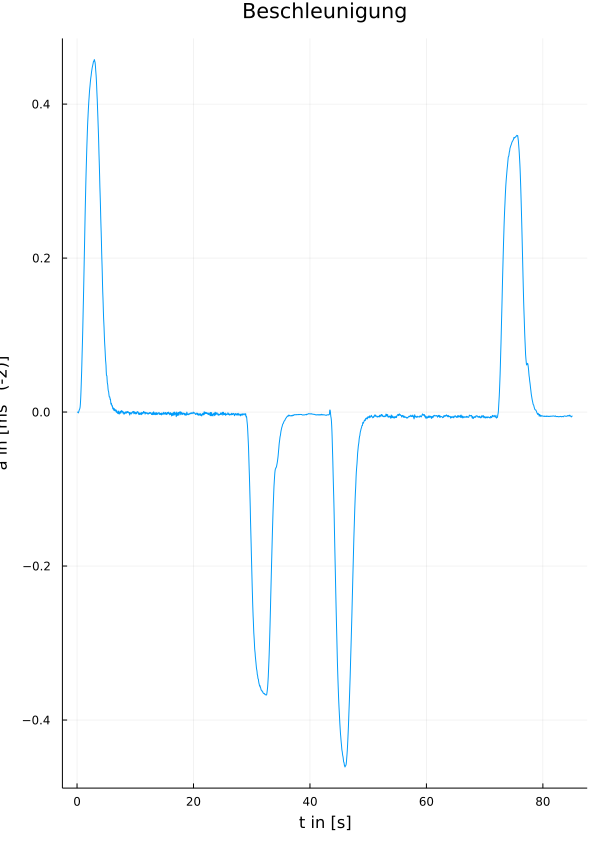

In [67]:
data = acc_by_jerk(data)
plot_layout(data.acc_and_vel[:, 3], data.acc_and_vel[:, 4], "acc", "Beschleunigung")

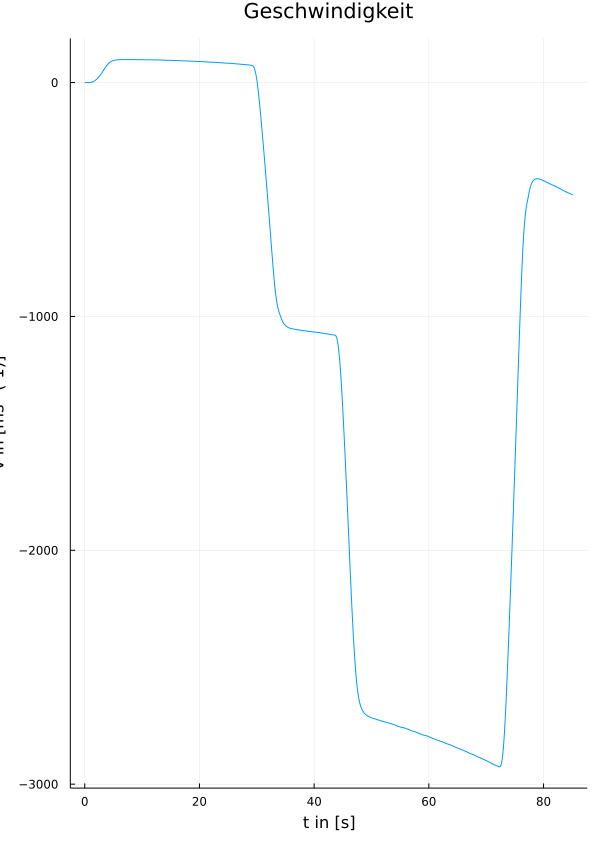

In [68]:
data = vel_by_acc(data)
plot_layout(data.acc_and_vel[:, 3], data.acc_and_vel[:, 5], "vel", "Geschwindigkeit")